In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
print(tf.__version__)  

2.11.0


## STEP 1 : 데이터 준비하기

In [5]:
from PIL import Image
import glob
import os

In [8]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.") 

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor'
resize_images(image_dir_path)


In [58]:
folders = ['/paper','/rock','/scissor']

In [59]:
for i in ['/train','/test'] :
    image_dir_path = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor'
    
    for j in folders :
        resize_images(image_dir_path+i+j)


208  images to be resized.


/var/folders/gw/_hckw7j932n6_zdqjr965yzc0000gn/T/ipykernel_11040/2238249178.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


208  images resized.
227  images to be resized.
227  images resized.
217  images to be resized.
217  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [60]:
image_dir_path_train = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor/train'
image_dir_path_test = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor/test'

In [61]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [62]:
trp =len(os.listdir(image_dir_path_train+'/paper'))
trs = len(os.listdir(image_dir_path_train+'/scissor'))
trr = len(os.listdir(image_dir_path_train+'/rock'))
trtot = trp + trs +trr

trtot

652

In [63]:
(x_train, y_train)=load_data(image_dir_path_train, number_of_data = trtot)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 652 입니다.
x_train shape: (652, 28, 28, 3)
y_train shape: (652,)


In [64]:
tsp =len(os.listdir(image_dir_path_test+'/paper'))
tss = len(os.listdir(image_dir_path_test+'/scissor'))
tsr = len(os.listdir(image_dir_path_test+'/rock'))
tstot = tsp + tss +tsr

tstot

300

In [65]:
(x_test, y_test)=load_data(image_dir_path_test, number_of_data = tstot)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (652, 28, 28, 3)
y_test shape: (652,)


라벨:  0


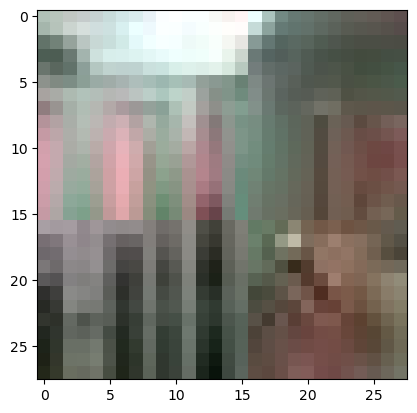

In [66]:
#이미지 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## STEP 2 : 딥러닝 네트워크 학습시키기

In [67]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 0, 1, 2

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (

In [68]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (652, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (652, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [69]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 2s 23ms/step - loss: 1.0792 - accuracy: 0.3742
Epoch 2/10
21/21 [==============================] - 1s 24ms/step - loss: 1.0246 - accuracy: 0.4724
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 0.9046 - accuracy: 0.6304
Epoch 4/10
21/21 [==============================] - 0s 22ms/step - loss: 0.7827 - accuracy: 0.6503
Epoch 5/10
21/21 [==============================] - 1s 26ms/step - loss: 0.6825 - accuracy: 0.7025
Epoch 6/10
21/21 [==============================] - 1s 24ms/step - loss: 0.6088 - accuracy: 0.7301
Epoch 7/10
21/21 [==============================] - 1s 23ms/step - loss: 0.5245 - accuracy: 0.8190
Epoch 8/10
21/21 [==============================] - 1s 26ms/step - loss: 0.4354 - accuracy: 0.8650
Epoch 9/10
21/21 [==============================] - 1s 24ms/step - loss: 0.3792 - accuracy: 0.8834
Epoch 10/10
21/21 [==============================] - 1s 26ms/step - loss: 0.3130 - accuracy: 0.9080


## STEP 3 : 얼마나 잘 만들었는지 확인하기

In [70]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.6582 - accuracy: 0.3467 - 449ms/epoch - 45ms/step
test_loss: 1.6582399606704712
test_accuracy: 0.3466666638851166


In [71]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 12ms/step
model.predict() 결과 :  [0.10238091 0.13819502 0.75942403]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


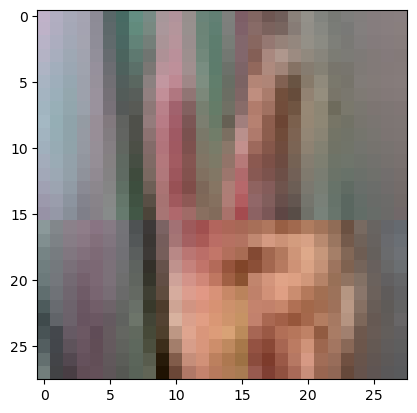

In [72]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.03877785 0.22451784 0.7367043 ]
라벨: 0, 예측결과: 2


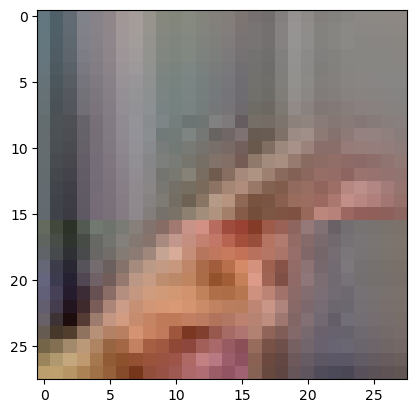

예측확률분포: [0.00933895 0.15236823 0.8382928 ]
라벨: 0, 예측결과: 2


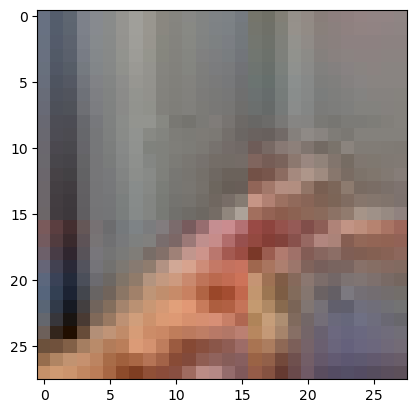

예측확률분포: [2.9755171e-04 2.4652420e-02 9.7505003e-01]
라벨: 1, 예측결과: 2


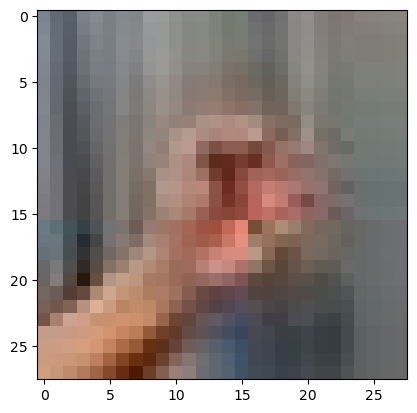

예측확률분포: [0.02434311 0.07346731 0.90218955]
라벨: 0, 예측결과: 2


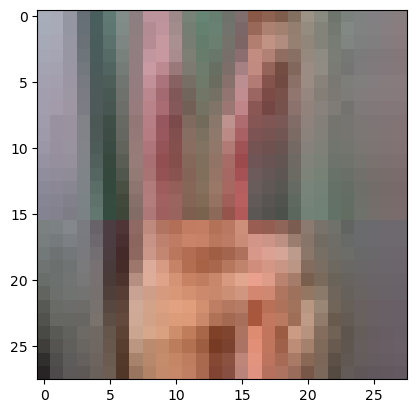

예측확률분포: [0.03120777 0.6192004  0.34959182]
라벨: 0, 예측결과: 1


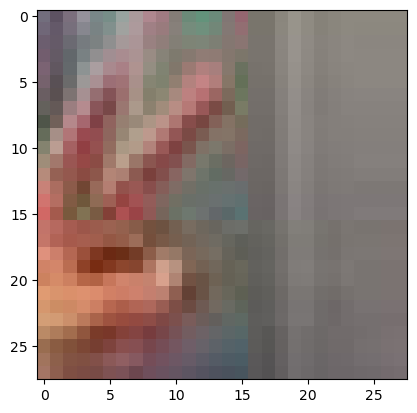

In [73]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## STEP 4 : 더 좋은 네트워크 만들어 보기

In [84]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32# 증가
n_channel_2=128 # 증가
n_channel_3=128 # 증가
n_dense=128 # 증가
n_train_epoch= 15 # 증가

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3,(3,3), activation='relu')) #layer 추가
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 1, 1, 128)      

## STEP 5 : 결론

이번에는 신경망을 이용해 이미지(가위, 바위, 보)를 분류하는 프로젝트를 수행하였습니다. 

모델 성능을 올리기 위해, 데이터 어그멘테이션, hyperparameter optimizing, layer 추가 등을 하였습니다. 

어려웠지만 목표 점수인 60%를 간신히 통과하였습니다.

아직까지 모델에 대한 전반적인 이해가 없어서, 어떤 이유로 성능이 개선되는지는 잘 모르겠습니다.

단순히 아래 링크를 찾아보고 몇가지 optimizing 방법을 테세트해본 결과뿐입니다.

앞으로 딥러닝 지식을 한층 더 올리면서 배워나가도록 하겠습니다. 

https://towardsdatascience.com/hacking-your-image-recognition-model-909ad4176247